# Import libraries

In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Sine Oscillator

In [359]:
def sine_osc(f0, dur, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2*np.pi*f0/fs
    phase = 0
    x = np.zeros(int(fs*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        x[n] = np.sin(phase)
        
    return x    

fs = 44100       # sampling rate (F)
dur = 0.5       # duration, 0.5 second
f0 = 261        # frequency to generate, you can change the frequency 

x_sin = sine_osc(f0,dur,fs)

ipd.Audio(x_sine, rate=fs)



### Plot the Sine Oscillator

Text(0.5, 0, 'frequency')

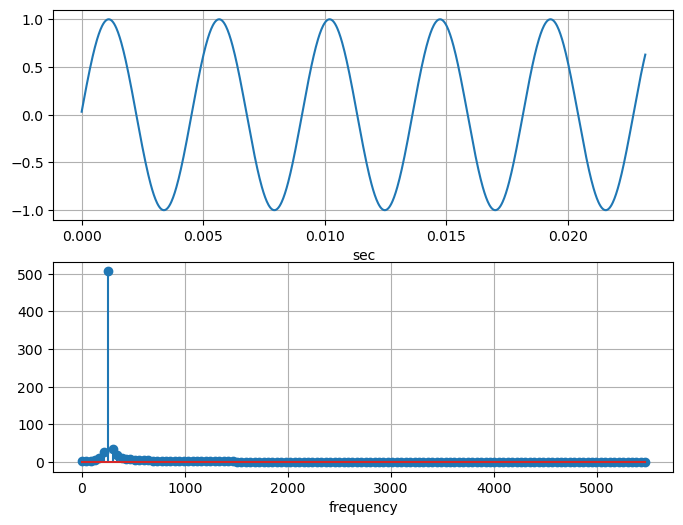

In [360]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_sine[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X_sin= np.fft.fft(x_sin[:M])
M2 = int(M/8)
X_sin_mag = np.abs(X_sin[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_sin_mag)
plt.grid(True)
plt.xlabel('frequency')


# Sawtooth Oscillator

In [361]:
def sawtooth_osc(f0, dur, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2/(fs/f0)
    phase = 0
    x = np.zeros(int(fs*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        x[n] = phase
        
    return x    


fs = 44100
f0 = 261
dur = 0.5
x_saw = sawtooth_osc(f0, dur, fs)
     
# BE CAREFUL: it is LOUD!!!    
ipd.Audio(x_saw, rate=fs)



### Plot the Sawtooth Oscillator

Text(0.5, 0, 'frequency')

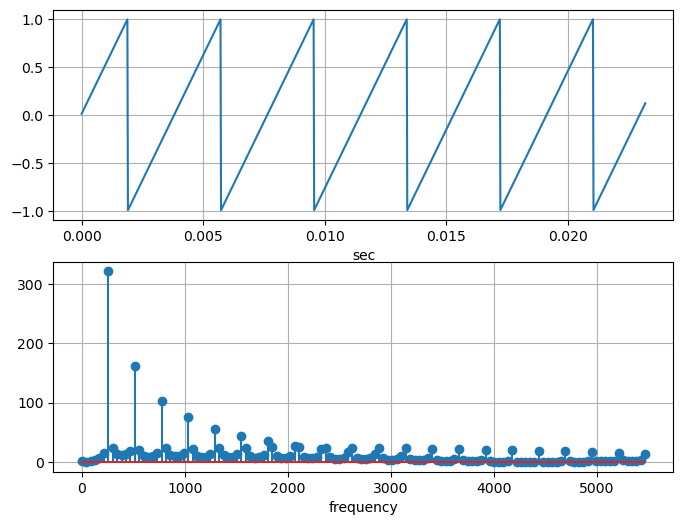

In [362]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_saw[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X_saw= np.fft.fft(x_saw[:M])
M2 = int(M/8)
X_saw_mag = np.abs(X_saw[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_saw_mag)
plt.grid(True)
plt.xlabel('frequency')


Note that this sawtooth oscillator has aliasing noise which becomes more discernable as the sampling rate is lower. 

# Square Oscillator

In [363]:
def square_osc(f0, dur, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2/(fs/f0)
    phase = 0
    x = np.zeros(int(fs*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        if phase > 0: 
            x[n] = 0.99
        else: 
            x[n] = -0.99
        
    return x    


fs = 44100
f0 = 261
dur = 0.5
x_sqr = square_osc(f0, dur, fs)


# BE CAREFUL: it is LOUD!!!    
ipd.Audio(x_sqr, rate=fs)



### Plot the Square Oscillator

Text(0.5, 0, 'frequency')

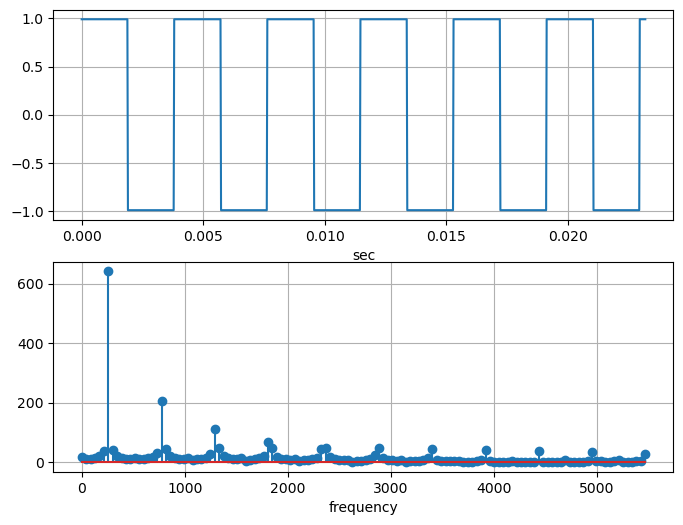

In [364]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_sqr[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X_sqr= np.fft.fft(x_sqr[:M])
M2 = int(M/8)
X_sqr_mag = np.abs(X_sqr[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_sqr_mag)
plt.grid(True)
plt.xlabel('frequency')

Note that this square oscillator has aliasing noise which becomes more discernable as the sampling rate is lower. 

# Noise Oscillator

In [365]:
def noise_osc(dur, fs): 
# fs:  sampling rate
# dur: duration
    x = (np.random.rand(int(fs*dur))-0.5)/2
    
    return x    


fs = 44100       # sampling rate (F)
dur = 0.5        # duration, 0.5 second
x_noise = noise_osc(dur, fs)


# BE CAREFUL: it is LOUD!!!    
ipd.Audio(x_noise, rate=fs)



### Plot the Noise Oscillator

Text(0.5, 0, 'frequency')

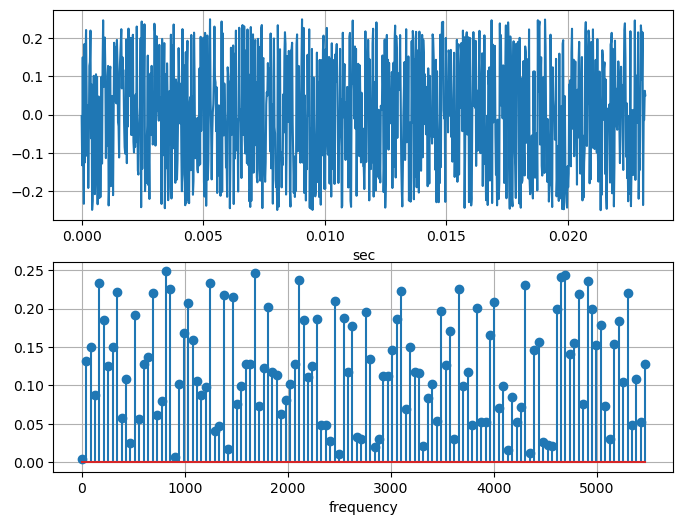

In [366]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_noise[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X= np.fft.fft(x_noise[:M])
M2 = int(M/8)
X_noise_mag = np.abs(x_noise[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_noise_mag)
plt.grid(True)
plt.xlabel('frequency')

# Envelope Generator


Text(0.5, 0, 'sec')

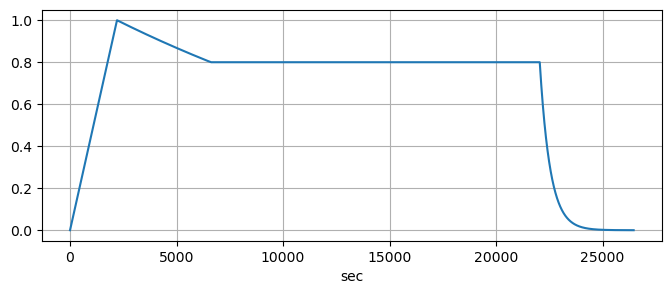

In [369]:
def amp_envelop(note_dur, attack_time, decay_time, sustain_level, release_time, fs): 
# fs: sampling rate
# note_dur: time interval between the onsets of attack and release 
# attack_time: in second
# decay_time: in second
# sustain_level: in second
# release_time: second 

    env_attack = np.linspace(0,1,int(attack_time*fs))
    env_decay = np.logspace(np.log10(1),np.log10(sustain_level),int(decay_time*fs))
    env_sustain = np.linspace(sustain_level,sustain_level,int((note_dur-decay_time-attack_time)*fs))
    env_release = np.logspace(np.log10(sustain_level),np.log10(0.0001),int(release_time*fs))

    env = np.append(env_attack, env_decay)
    env = np.append(env, env_sustain)
    env = np.append(env, env_release)

    return env    

# amplitude envelope
attack_time = 0.05  
decay_time = 0.1  
sustain_level = 0.8 
release_time = 0.1  

fs = 44100
dur = 0.5 
amp_env = amp_envelop(dur, attack_time, decay_time, sustain_level, release_time, fs)

plt.figure(figsize=(8, 3))
plt.plot(amp_env)
plt.grid(True)
plt.xlabel('sec')

# Oscillators + Amplitude Envelop

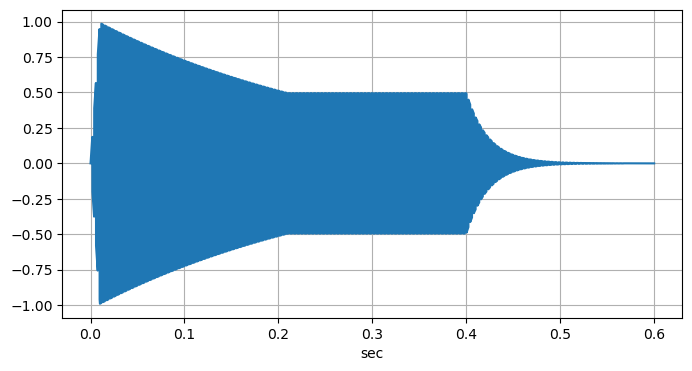

In [370]:
def amp_env2(note_dur, attack_time, decay_time, fs): 
# simple amplitude envelope generator
    
# note_dur : time interval between the onsets of attack and release 
# attack_time: in second
# decay_time: in second
# fs: sampling rate

    env_attack = np.linspace(0,1,int(attack_time*fs))
    env_decay = np.logspace(np.log10(1),np.log10(0.0001), x_len-int(attack_time*fs))

    env = np.append(env_attack, env_decay)

    return env    

fs = 44100
f0 = 261

note_dur = 0.4  
attack_time = 0.01  
decay_time = 0.2  
sustain_level = 0.5  
release_time = 0.2  

# osc--> amp_envelop
x_note = square_osc(f0, note_dur+release_time, fs) 
amp_env = amp_envelop(note_dur, attack_time, decay_time, sustain_level, release_time, fs)
x_note = amp_env*x_note[:len(amp_env)]

plt.figure(figsize=(8, 4))
n= np.arange(len(x_note))
plt.plot(n/fs, x_note)
plt.grid(True)
plt.xlabel('sec')


ipd.Audio(x_note, rate=fs)



# Filters

In [ ]:
def res_lowpass(x, cutoff_freq, Q, fs):
# x: input signal
# cutoff_freq: cut-off frquency, Hz
# Q: resonance, a small positive value (e.g. 0.001)to +inf

    # bi-quad lowpass filter
    theta = 2*np.pi*cutoff_freq/fs
    alpha = np.sin(theta)/2/Q
    b = [(1-np.cos(theta)), 2*(1-np.cos(theta)), (1-np.cos(theta))]
    a = [(1+alpha), -2*np.cos(theta), (1-alpha)]

    # apply the filter
    y = signal.lfilter(b,a,x)
    return y 


def res_highpass(x, cutoff_freq, Q, fs):
# x: input signal
# cutoff_freq: cut-off frquency, Hz
# Q: resonance, a small positive value (e.g. 0.001)to +inf

    # bi-quad highpass filter
    theta = 2*np.pi*cutoff_freq/fs
    alpha = np.sin(theta)/2/Q
    b = [(1+np.cos(theta)), -2*(1+np.cos(theta)), (1+np.cos(theta))]
    a = [(1+alpha), -2*np.cos(theta), (1-alpha)]

    # apply the filter
    y = signal.lfilter(b,a,x)
    return y 


def res_bandpass(x, cutoff_freq, Q, fs):
# x: input signal
# cutoff_freq: cut-off frquency, Hz
# Q: resonance, a small positive value (e.g. 0.001)to +inf

    # bi-quad bandpass filter
    theta = 2*np.pi*cutoff_freq/fs
    alpha = np.sin(theta)/2/Q
    b = [alpha, 0, -alpha]
    a = [(1+alpha), -2*np.cos(theta), (1-alpha)]

    # apply the filter
    y = signal.lfilter(b,a,x)
    return y 




# Oscillators + Filters + Amplitude Envelop

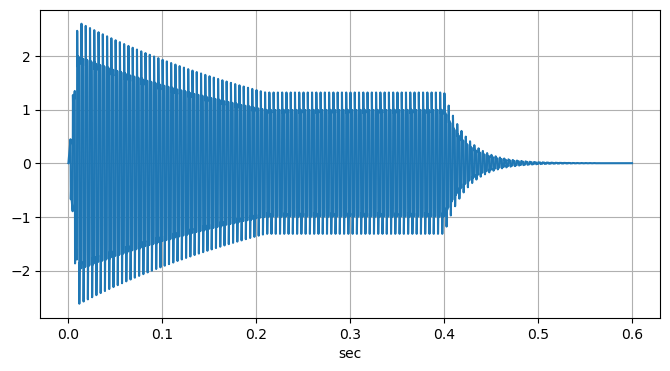

In [376]:

fs = 44100
f0 = 220
cutoff_freq = 2000 
Q = 1  

note_dur = 0.4 
attack_time = 0.01 
decay_time = 0.2  
sustain_level = 0.5  
release_time = 0.2 

# osc--> filter --> amp_envelop
x_note = square_osc(f0, note_dur+release_time, fs)
x_note = res_lowpass(x_note, cutoff_freq, Q, fs)
amp_env = amp_envelop(note_dur, attack_time, decay_time, sustain_level, release_time, fs)
x_note = amp_env*x_note[:len(env)]

plt.figure(figsize=(8, 4))
n= np.arange(len(x_note))
plt.plot(n/fs, x_note)
plt.grid(True)
plt.xlabel('sec')

ipd.Audio(x_note, rate=fs)